# Laboratory Work: Pichu and Pikachu Classification

In this laboratory exercise, we will use data on the lengths and widths of Pichus and Pikachus to develop an algorithm for classifying new data points.

### Loading Data
Let's begin by loading the data.

In [41]:
import pandas as pd
import numpy as np

pok = pd.read_csv(".\\datapoints.txt")

# as for now, I feel more convenient with the visualization of arrays rather than data frames
numpok = pok.to_numpy()

# as the separator was "," there was the fourth column "1-pikachu" with no data, which I will just drop.
pokemon = numpok[:,:-1]
print (pokemon[:5])

[[21.9593845  31.23956701  0.        ]
 [23.63591632 36.46821491  1.        ]
 [17.71405642 31.44170391  0.        ]
 [21.78020032 33.21339776  1.        ]
 [25.20630553 36.55881615  1.        ]]


###  Data Visualization
For visualization purposes, we will plot all the data points, assigning a unique color to each class.


In [30]:
import matplotlib.pyplot as plt
%matplotlib inline

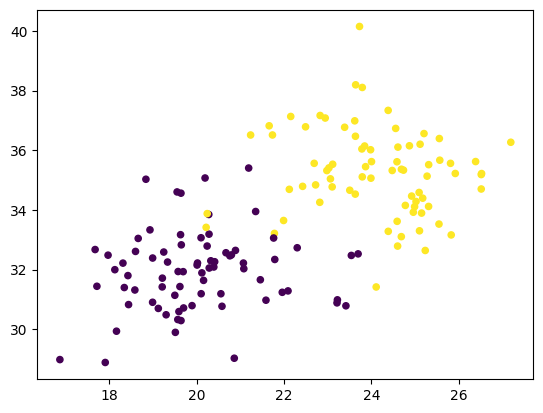

In [47]:
plt.scatter(pokemon[:,0], pokemon[:,1], s = 20, c = pokemon[:,2])